In [108]:
cls_path = "/storage/slurm/schnackl/fakesync/cav-mae-sync/outputs/fakeavceleb/manual_pre"

In [109]:
import pickle as pkl
import os
import pandas as pd
import torch
import numpy as np
np.set_printoptions(suppress=True, linewidth=200, edgeitems=5, threshold=11)
torch.set_printoptions(sci_mode=False, linewidth=200, edgeitems=5, threshold=11)

### Test model input

In [110]:
# test fo input anlyse
p = "/storage/slurm/schnackl/fakesync/cav-mae-sync/outputs/vgg_test/input_batch_0.pkl"
audio_input, video_input, labels = pkl.load(open(p, "rb"))
print(audio_input.shape, video_input.shape, labels.shape)

(4, 16, 256, 128) (4, 16, 3, 224, 224) (4,)


Text(0.5, 1.0, 'Audio Input Heatmap')

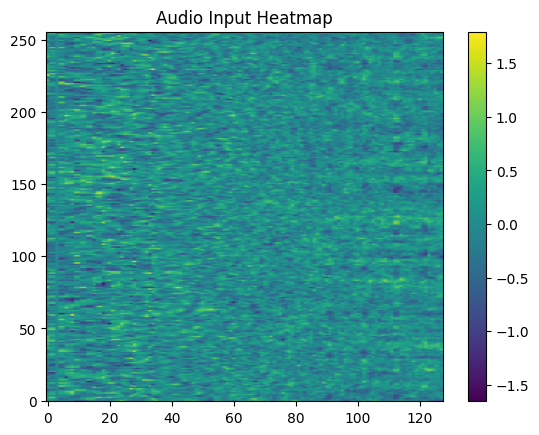

In [111]:
# heatmap of audio input[0][0]
import matplotlib.pyplot as plt
plt.imshow(audio_input[1][4]-audio_input[1][5], aspect='auto', origin='lower')
plt.colorbar()
plt.title('Audio Input Heatmap')

### Test model output

In [112]:
logs = []
files = sorted(os.listdir(cls_path))
for file in files[0:2]:
    if file.endswith(".pkl"):
        print("loadeing", file)
        data = pkl.load(open(os.path.join(cls_path, file), "rb"))
        logs.append(data)
        break

loadeing forward_embeddings_0.pkl


In [113]:
df = pd.DataFrame()
for batch in logs:
    df = pd.concat([df, pd.DataFrame(batch)], ignore_index=True)

# sample size
df = df.sample(n=min(df.shape[0],32), random_state=42)

In [114]:
df.head()

,video_name,label,audio_out,video_out,cls_a,cls_v
0,FakeVideo-RealAudio-Caucasian (American)-men-i...,tensor(1.),"[[[0.6630509, 0.3712621, -0.47230023, -0.86066...","[[[2.1302695, 0.58634186, 0.13560893, -1.15400...","[[0.17034334, 0.85196346, 0.9851953, -1.010367...","[[0.72412384, 0.2774155, -0.039524738, 1.13056..."
1,FakeVideo-FakeAudio-Caucasian (European)-men-i...,tensor(1.),"[[[0.5821026, -0.35192725, -0.5173546, -0.5622...","[[[-1.5639871, -1.1515497, 0.41497892, -0.0782...","[[0.5479453, 0.4493031, 1.0982807, -0.24001168...","[[-0.9133221, -0.6789273, 0.095846534, 0.18538..."
5,RealVideo-RealAudio-Caucasian (European)-men-i...,tensor(0.),"[[[-0.89654905, -0.2306734, 0.6383268, 0.65020...","[[[-1.4004024, -0.57790875, -0.8102194, 0.8449...","[[-0.3685129, -0.20939639, 0.90417075, 0.97740...","[[0.09162553, 0.68832797, -0.915976, 1.1976587..."
14,FakeVideo-RealAudio-African-men-id01170-00021_...,tensor(1.),"[[[-0.2069918, -0.25374296, -0.30130598, -0.25...","[[[-1.2572354, 0.36024362, 0.041148726, -0.139...","[[0.6584094, 0.5411682, 1.015259, -0.23409177,...","[[-0.49679348, -0.6053607, 0.16547409, 1.25094..."
13,FakeVideo-RealAudio-Caucasian (American)-women...,tensor(1.),"[[[0.32210323, 0.249191, 0.20867038, -0.252055...","[[[-0.26549935, -0.092456885, -0.18824662, 0.2...","[[-0.020843472, 0.102973446, 1.0380046, 0.6243...","[[-0.46141395, 0.053545486, -0.4208629, 1.0578..."


In [115]:
for col in df.columns:
    print(col, df[col].iloc[0].shape if isinstance(df[col].iloc[0], np.ndarray) else df[col].iloc[0])

video_name FakeVideo-RealAudio-Caucasian (American)-men-id01168-00028_id03525_wavtolip
label tensor(1.)
audio_out (16, 128, 768)
video_out (16, 196, 768)
cls_a (16, 768)
cls_v (16, 768)


In [117]:
cls_v = torch.tensor(df.cls_v.iloc[2])
cls_a = torch.tensor(df.cls_a.iloc[2])

In [138]:
cls_a.shape

torch.Size([16, 768])

In [137]:
print("cls_a")
print(cls_a)
print((cls_a[0:16] - cls_a[0]).abs())
print("cls_v")
print(cls_v)
print((cls_v[0:16] - cls_v[0]).abs())

cls_a
tensor([[-0.3685, -0.2094,  0.9042,  0.9774,  1.3221,  ..., -0.4170,  0.1469,  0.0096,  0.3344, -0.4050],
        [-0.3685, -0.2094,  0.9042,  0.9774,  1.3221,  ..., -0.4170,  0.1469,  0.0096,  0.3344, -0.4050],
        [-0.3685, -0.2094,  0.9042,  0.9774,  1.3221,  ..., -0.4170,  0.1469,  0.0096,  0.3344, -0.4050],
        [-0.0775, -0.3700,  0.9712,  0.9593,  1.2656,  ..., -0.3432,  0.0650, -0.0071,  0.2598, -0.4446],
        [-0.3860, -0.4273,  0.8003,  1.1640,  1.4456,  ..., -0.3249, -0.0480, -0.1378,  0.3230, -0.4651],
        ...,
        [-0.8454, -0.3150,  0.4935,  2.1309,  1.2898,  ...,  0.5534,  0.0111,  0.4920,  0.7347,  0.1991],
        [-0.8454, -0.3150,  0.4935,  2.1309,  1.2898,  ...,  0.5534,  0.0111,  0.4920,  0.7347,  0.1991],
        [-0.8454, -0.3150,  0.4935,  2.1309,  1.2898,  ...,  0.5534,  0.0111,  0.4920,  0.7347,  0.1991],
        [-0.8454, -0.3150,  0.4935,  2.1309,  1.2898,  ...,  0.5534,  0.0111,  0.4920,  0.7347,  0.1991],
        [-0.8454, -0.3150, 

In [139]:
np.mean(df.cls_a.iloc[0], axis=1)
# only first entry similar

array([-0.00000001,  0.00000001,  0.        , -0.00000002,  0.00000001, ..., -0.        , -0.        , -0.00000001,  0.        , -0.        ], shape=(16,), dtype=float32)

In [151]:
# import cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
# do per time step the cosine sim between cls_a and cls_b
cos_sim = cosine_similarity(
    df.cls_a.iloc[2],
    df.cls_v.iloc[2]
)
cos_sim

array([[-0.03748941, -0.03787375, -0.03892045, -0.03560007, -0.04018138, ..., -0.03696768, -0.03714276, -0.03702104, -0.03466469, -0.0343546 ],
       [-0.03748941, -0.03787373, -0.03892044, -0.03560006, -0.04018133, ..., -0.03696767, -0.03714275, -0.03702102, -0.03466467, -0.03435459],
       [-0.03748941, -0.03787373, -0.03892042, -0.03560007, -0.04018134, ..., -0.03696767, -0.03714275, -0.03702103, -0.03466467, -0.03435459],
       [-0.03960643, -0.0400876 , -0.04102599, -0.03730904, -0.04243077, ..., -0.03881945, -0.03918087, -0.03897302, -0.03627713, -0.03616406],
       [-0.03964278, -0.04032671, -0.04192185, -0.03799896, -0.04255658, ..., -0.03958349, -0.04005353, -0.03978635, -0.03675465, -0.03643619],
       ...,
       [-0.01666765, -0.01578393, -0.01885532, -0.0184889 , -0.0161894 , ..., -0.01926151, -0.01783553, -0.01842518, -0.02178695, -0.01900949],
       [-0.01666765, -0.01578394, -0.01885532, -0.01848889, -0.0161894 , ..., -0.01926151, -0.01783553, -0.01842517, -0.0217

In [147]:
import numpy as np
A = np.array(df.cls_a.iloc[0])  # shape (T, D)
V = np.array(df.cls_v.iloc[0])  # shape (T, D)
# A, V: shape (T, D)
A_norm = A / np.linalg.norm(A, axis=1, keepdims=True)
V_norm = V / np.linalg.norm(V, axis=1, keepdims=True)

# elementwise dot product across features → cosine similarity per timestep
similarities = np.sum(A_norm * V_norm, axis=1)  # shape (T,)
similarities

array([-0.05372757, -0.05372753, -0.05372757, -0.04557655, -0.04345334, ..., -0.01568507, -0.01998011, -0.01970789, -0.01633423, -0.01805088], shape=(16,), dtype=float32)

In [125]:
import random

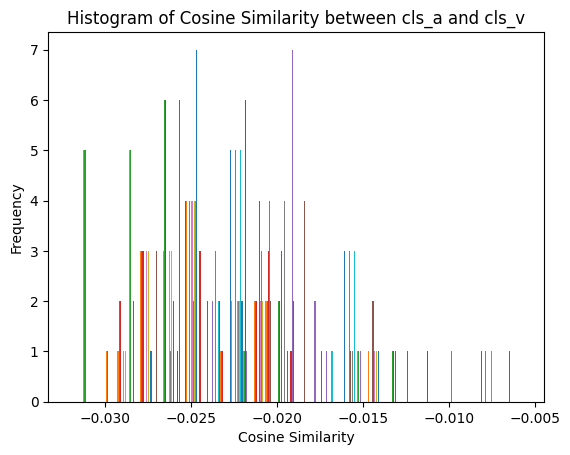

In [176]:
idx = 3
a = df.cls_a.iloc[idx]
b = df.cls_v.iloc[idx]
b_shuffled = b
random.shuffle(b_shuffled)
y = cosine_similarity(a, b)
# histogram of y
import matplotlib.pyplot as plt

plt.hist(y, bins=20)
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.title('Histogram of Cosine Similarity between cls_a and cls_v')
plt.show()

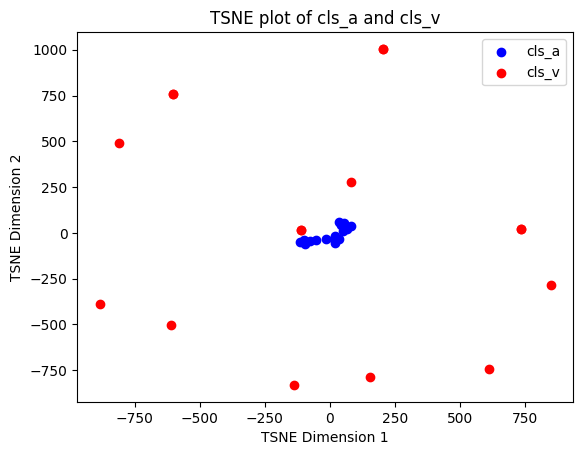

In [177]:
# tsne plot of cls_a and cls_v
from sklearn.manifold import TSNE   
import numpy as np
tsne = TSNE(n_components=2, random_state=0, perplexity=5)
a_2d = tsne.fit_transform(a)

# scatter plot of a_2d
plt.scatter(a_2d[:, 0], a_2d[:, 1], c='blue', label='cls_a')
b_2d = tsne.fit_transform(b)
plt.scatter(b_2d[:, 0], b_2d[:, 1], c='red', label='cls_v')
plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.title('TSNE plot of cls_a and cls_v')
plt.legend()

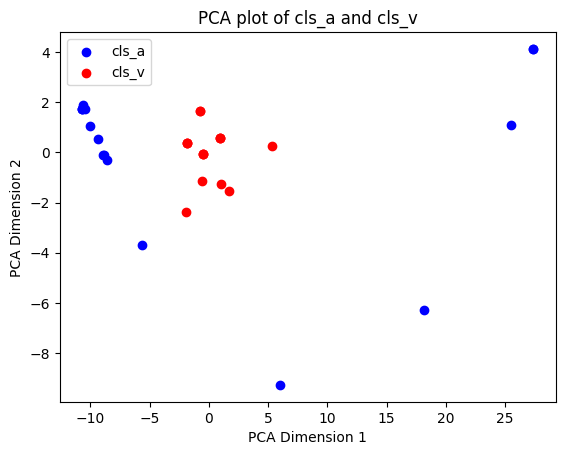

In [178]:
# pca
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
a_2d_pca = pca.fit_transform(a)
b_2d_pca = pca.fit_transform(b)
# scatter plot of a_2d_pca and b_2d_pca
plt.scatter(a_2d_pca[:, 0], a_2d_pca[:, 1], c='blue', label='cls_a')
plt.scatter(b_2d_pca[:, 0], b_2d_pca[:, 1], c='red', label='cls_v')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.title('PCA plot of cls_a and cls_v')
plt.legend()
plt.show()

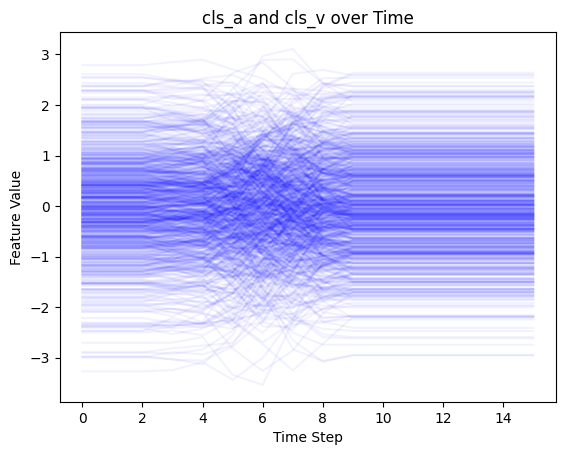

In [184]:
idx = 5
a = df.cls_a.iloc[idx]
b = df.cls_v.iloc[idx]
# plot cls_a and cls_v over time
for i in range(a.shape[1]):
    plt.plot(a[:, i], label='cls_a dim {}'.format(i), color='blue', alpha=0.05)
    # plt.plot(b[:, i], label='cls_v dim {}'.format(i), color='red', alpha=0.05)
plt.xlabel('Time Step')
plt.ylabel('Feature Value')
plt.title('cls_a and cls_v over Time')
# plt.legend(None)
plt.show()

In [ ]:
# 